In [437]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [438]:
class DataProcessor:
    def load_data(self):
        # to Load the data from the CSV file using Pandas
        data = pd.read_csv('imdb-videogames.csv', index_col=0)
        return data
    
    def clean_data(self, data):
        data = data.dropna()# to clean the data by removing rows with missing values and unnecessary columns
        data = data.drop(['url'], axis=1)  # to drop column 
        return data


In [439]:
data_processor = DataProcessor()
data = data_processor.load_data()
cleaned_data = data_processor.clean_data(data)

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20803 entries, 0 to 20802
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   url          20803 non-null  object 
 2   year         20535 non-null  float64
 3   certificate  7903 non-null   object 
 4   rating       11600 non-null  float64
 5   votes        11600 non-null  object 
 6   plot         20801 non-null  object 
 7   Action       20790 non-null  object 
 8   Adventure    20786 non-null  object 
 9   Comedy       20789 non-null  object 
 10  Crime        20783 non-null  object 
 11  Family       20776 non-null  object 
 12  Fantasy      20786 non-null  object 
 13  Mystery      20780 non-null  object 
 14  Sci-Fi       20783 non-null  object 
 15  Thriller     20793 non-null  object 
dtypes: float64(2), object(14)
memory usage: 2.7+ MB


In [441]:
data

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


In [442]:
data.columns

Index(['name', 'url', 'year', 'certificate', 'rating', 'votes', 'plot',
       'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [443]:
cleaned_data["votes"] = cleaned_data["votes"].str.replace(",", "")
cleaned_data["votes"] = cleaned_data["votes"].astype(float)
cleaned_data = cleaned_data[cleaned_data["year"].between(2000, 2022)]
cleaned_data = cleaned_data.set_axis(range(len(cleaned_data)))
cleaned_data

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,20759.0,"When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,26118.0,"After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,The Haunted Mansion,2003.0,T,6.8,52.0,Trouble has found Zeke Holloway. In this famou...,False,False,False,False,False,False,False,False,True
5082,Pacify,2019.0,T,5.8,38.0,There is reportedly an evil inside that house....,False,False,False,False,False,False,False,False,True
5083,Five Nights at Pinkie's 4,2015.0,PG-13,7.1,9.0,Five Nights at Pinkie's is an horror game wher...,False,False,False,False,False,False,False,False,True
5084,Death March Club,2020.0,T,7.3,10.0,A group of underachiever elementary school stu...,False,False,False,False,False,False,False,False,True


In [444]:
class DataAnalyzer:
    def get_average_of_column(self, data):
        # to Calculate the average rating for each given column and return a DataFrame
        mean = cleaned_data.groupby('year')[data].mean()
        return mean
    def get_distribution_of_column(self, data):
        # Calculate the distribution of given column and return a DataFrame
        distribution = cleaned_data[data].value_counts().reset_index()
        distribution.columns = [data, 'count']
        return distribution
    def get_median_of_column(self, data):
        # Calculate the median of given column and return a DataFrame
        median=cleaned_data.groupby('certificate')[data].median()
        return median
    def get_mode_of_column(self, data):
        # Calculate the mode of given column count and return a DataFrame
        mode=cleaned_data[data].mode()
        return mode

In [445]:
data_analyzer = DataAnalyzer()
mean = data_analyzer.get_average_of_column('rating')
print(mean)
print(max(mean))

year
2000.0    7.028395
2001.0    7.191120
2002.0    7.176125
2003.0    7.118248
2004.0    7.385560
2005.0    7.401128
2006.0    7.210700
2007.0    7.290295
2008.0    7.286735
2009.0    7.168807
2010.0    7.348485
2011.0    7.432273
2012.0    7.287168
2013.0    7.304219
2014.0    7.208000
2015.0    7.308019
2016.0    7.314407
2017.0    7.318908
2018.0    7.408911
2019.0    7.260000
2020.0    7.239623
2021.0    7.327451
2022.0    7.672000
Name: rating, dtype: float64
7.672


In [446]:
data_analyzer = DataAnalyzer()
distribution = data_analyzer.get_distribution_of_column('rating')
print(distribution)


    rating  count
0      7.4    210
1      7.6    207
2      7.7    203
3      7.8    201
4      7.2    198
..     ...    ...
78     2.7      1
79     2.0      1
80     2.6      1
81     1.0      1
82     1.3      1

[83 rows x 2 columns]


In [447]:
data_analyzer = DataAnalyzer()
median_recommendations = data_analyzer.get_median_of_column('votes')
print(median_recommendations)
max(median_recommendations)

certificate
12            16.0
AO           118.0
Approved      43.0
CE            15.0
E             62.0
E10+          96.0
EC            14.0
G             16.0
K-A           65.0
M            391.5
MA-17         71.5
Not Rated     50.0
PG-13         28.5
T            102.5
TV-14        127.0
TV-MA          8.0
Unrated       55.0
Name: votes, dtype: float64


391.5

In [448]:
data_analyzer = DataAnalyzer()
median = data_analyzer.get_mode_of_column('year')
freq = cleaned_data['year'].value_counts()[median]
freq

2002.0    289
Name: year, dtype: int64

In [449]:
class DataVisualizer:
    def plot_line_chart(self, p1, p2, p3):
        # Create a line plot of given dataframe column
        sns.lineplot(x=cleaned_data[p1], y=cleaned_data[p2], hue=cleaned_data[p3])
        plt.savefig("output/plot_line_chart.png")
    
    def plot_distribution(self, p1,p2):
        # Create a bar plot of given dataframe column
        sns.histplot(x=cleaned_data[p1], data=cleaned_data ,kde=True , hue=cleaned_data[p2])
        plt.savefig("output/plot_distribution.png")
    
    def plot_pie(self, p1):
        # Create a pie plot of given dataframe column
        plt.figure(figsize=(8, 8))
        data[p1].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.savefig("output/plot_pie.png")
        plt.show()
    def plot_scatter(self, p1,p2,p3):
        # Create a scatter plot of given dataframe column
        sns.scatterplot(x=cleaned_data[p1], y=cleaned_data[p2], hue=cleaned_data[p3])
        plt.savefig("output/plot_scatter.png")

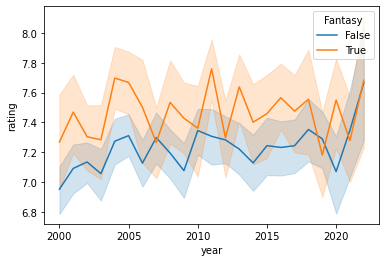

In [450]:
data_visualizer = DataVisualizer()
#in plot_line_chart pass x value then y value then hue value
data_visualizer.plot_line_chart('year', 'rating', 'Fantasy')

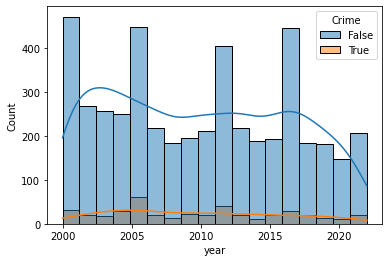

In [451]:
data_visualizer = DataVisualizer()
#in plot_distribution pass x value then then hue value
data_visualizer.plot_distribution('year','Crime')

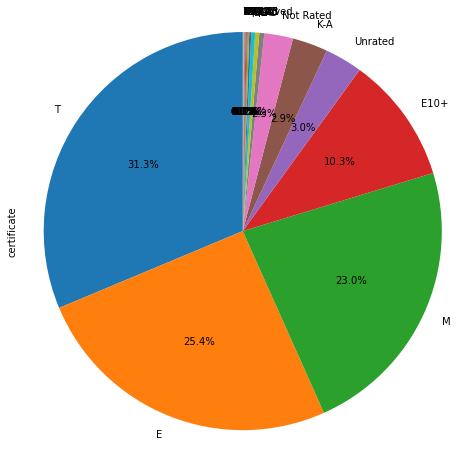

In [452]:
data_visualizer = DataVisualizer()
#in plot_pie pass coluumn to be plotted
data_visualizer.plot_pie('certificate')

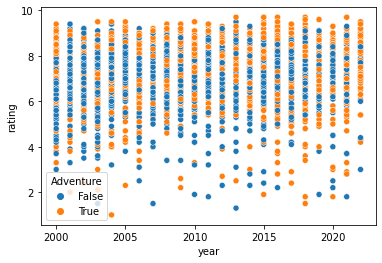

In [453]:
data_visualizer = DataVisualizer()
#in plot_scatter pass x value then y value then hue value
data_visualizer.plot_scatter('year','rating','Adventure')